# Anderson Cancer Center Data: Linear Regression

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('trainingData-release.csv')

data_top = data.head()

data.head()

,#Patient_id,SEX,Age.at.Dx,AHD,PRIOR.MAL,PRIOR.CHEMO,PRIOR.XRT,Infection,cyto.cat,ITD,...,VHL,WTAP,XIAP,XPO1,YAP1,YAP1p,YWHAE,YWHAZ,ZNF296,ZNF346
0,train_id_001,F,63.85,0,YES,NO,YES,No,diploid,NEG,...,-0.722347,-0.887311,1.140104,-0.199574,-0.598099,-1.086189,-1.182815,0.336552,-0.291540,-0.156785
1,train_id_002,F,57.45,24,NO,NO,NO,Yes,diploid,NEG,...,-0.401240,0.228719,2.025590,-0.268515,0.035639,-0.498447,-0.391924,-0.654588,0.110702,1.260718
2,train_id_003,F,59.49,5,YES,YES,YES,No,-5,NEG,...,0.322115,0.578631,-1.918884,-1.485057,-0.214276,-0.115862,0.503870,-0.263103,-0.500761,0.147560
3,train_id_004,M,46.38,0,NO,NO,NO,Yes,IM,ND,...,0.460794,-0.724971,2.274829,0.837169,-0.240740,-0.788800,-0.986515,-0.510208,0.910813,-0.303119
4,train_id_005,M,66.95,0,YES,NO,NO,No,Misc,NEG,...,-0.330346,-1.460989,0.004068,-1.152868,0.450986,0.753539,0.011574,-0.973533,-0.599299,0.459281


In [2]:
# Select the relevant columns
X = data.drop(['#Patient_id', 'Overall_Survival'], axis=1)
y = data['Overall_Survival']

print(y)

0      568.57
1      185.86
2       56.29
3       98.14
4      454.71
        ...  
186     42.00
187     27.43
188    479.14
189     77.86
190     36.14
Name: Overall_Survival, Length: 191, dtype: float64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [4]:
# display the first 5 rows of the data
data.head()

# display the shape of the data
data.shape

# display the summary statistics of the data
data.describe()

# display the data types of the columns
data.dtypes

#Patient_id     object
SEX             object
Age.at.Dx      float64
AHD              int64
PRIOR.MAL       object
                ...   
YAP1p          float64
YWHAE          float64
YWHAZ          float64
ZNF296         float64
ZNF346         float64
Length: 272, dtype: object

In [5]:
data.isnull().sum()

#Patient_id    0
SEX            0
Age.at.Dx      0
AHD            0
PRIOR.MAL      0
              ..
YAP1p          0
YWHAE          0
YWHAZ          0
ZNF296         0
ZNF346         0
Length: 272, dtype: int64

In [6]:
# drop rows with missing values from numeric columns only
numeric_cols = data.select_dtypes(include="number").columns
data = data.dropna(subset=numeric_cols)

# separate the target variable from the features
X = data.drop("Overall_Survival", axis=1)
y = data["Overall_Survival"]

# scale the data using the z-score normalization
X = (X - X.mean()) / X.std()


C:\Users\tacos\AppData\Local\Temp\ipykernel_16068\3586194961.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X = (X - X.mean()) / X.std()


In [7]:
from sklearn.impute import SimpleImputer

# create an instance of the SimpleImputer class to impute missing values
imputer = SimpleImputer()

# preprocess the data by imputing missing values and scaling the features
X = imputer.fit_transform(X)
X = (X - X.mean()) / X.std()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an instance of the linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)


In [8]:
# calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

R-squared: 0.5228366324503757
MSE: 19411.431178821444


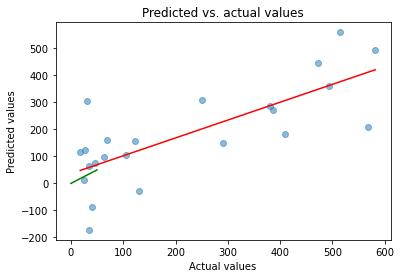

In [9]:
# create a scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.linspace(0, 50, 100), np.linspace(0, 50, 100), color='green')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs. actual values")
plt.show()

### Improving the model